In [17]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

current_dir = os.getcwd()

In [7]:
building_density = pd.read_csv(os.path.join(current_dir, "..", "SharedData", "County_Building_Areas_Adjusted.csv"))
building_density['CNTY_FIPS'] = building_density['CNTY_FIPS'].astype(str).str.zfill(3)
building_density['STATE_FIPS'] = building_density['STATE_FIPS'].astype(str).str.zfill(2)
building_density["FIPS"] = building_density["STATE_FIPS"] + building_density["CNTY_FIPS"]
building_density.head()

,STATE_NAME,STATECODE,STATE_FIPS,COUNTY,CNTY_FIPS,total_bldg_area,LandAreaSqMiles,bldg_area_per_sq_mile,FIPS
0,Alabama,AL,01,Autauga,001,6993000,594.44,11764.013189,01001
1,Alabama,AL,01,Baldwin,003,60335200,1589.78,37951.917875,01003
2,Alabama,AL,01,Barbour,005,6098300,884.88,6891.668927,01005
3,Alabama,AL,01,Bibb,007,1386100,622.58,2226.380545,01007
4,Alabama,AL,01,Blount,009,2821200,644.78,4375.445889,01009


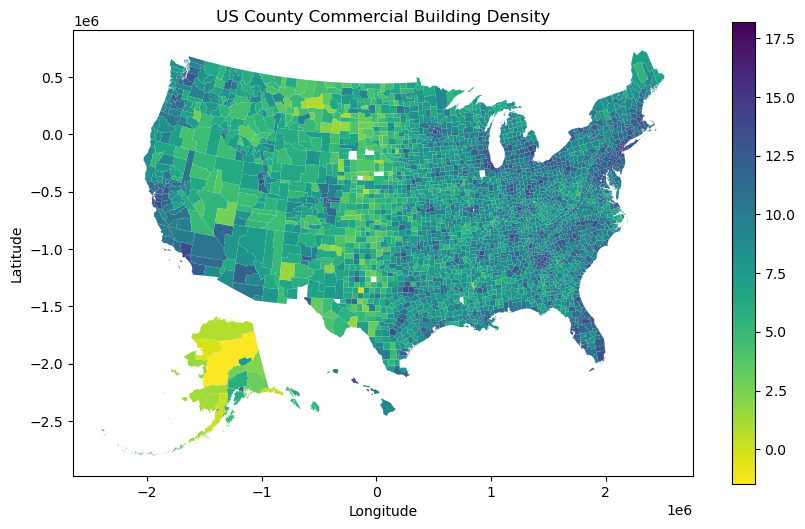

In [19]:
counties = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'Counties2', 'us_county.shp')).rename(columns={"GEOID": "FIPS"})

merged = counties.merge(building_density, how="inner", left_on="FIPS", right_on="FIPS")
merged.sort_values("bldg_area_per_sq_mile", ascending=False)
merged['log_density'] = np.log(merged['bldg_area_per_sq_mile']) # Log transformed because New York County (manhattan) is vastly denser than all other counties

column_to_plot = 'log_density'

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column=column_to_plot, cmap='viridis_r', linewidth=0.01, ax=ax, edgecolor='0.8', legend=True)
plt.title('US County Commercial Building Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

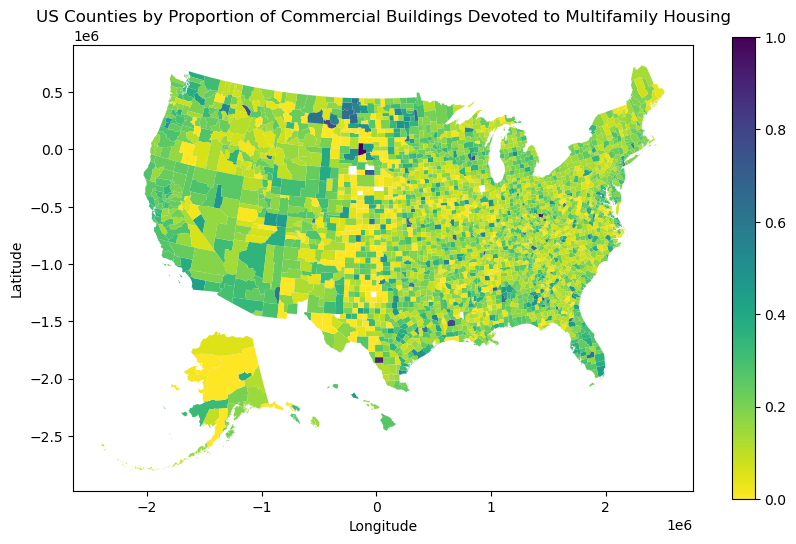

In [44]:
master_buildings = pd.read_csv(os.path.join(current_dir, "..", "SharedData", "County_Buildings_MASTER.csv"))

master_buildings['FIPS'] = master_buildings['FIPS'].astype(str).str.zfill(5)
merged = counties.merge(master_buildings, how="inner", on="FIPS")

merged["adjusted"] = merged["area_sum_Multifamily"] / merged["total_bldg_area"]

column_to_plot = 'adjusted'

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column=column_to_plot, cmap='viridis_r', linewidth=0.01, ax=ax, edgecolor='0.8', legend=True)
plt.title('US Counties by Proportion of Commercial Buildings Devoted to Multifamily Housing')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()